In [2]:
from pathlib import Path

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
data = Path('../data')
results = Path('../results-32-128-aug-32')

In [67]:
label = pd.read_csv(str(data.joinpath('test-label.csv'))).values[:, -1]
pred = pd.read_csv(str(results.joinpath('prediction.csv'))).values[:, -1]

In [68]:
label = (label - label.min()) / (label.max() - label.min())
pred = (pred - pred.min()) / (pred.max() - pred.min())

In [69]:
x_range = np.arange(np.size(label, 0))

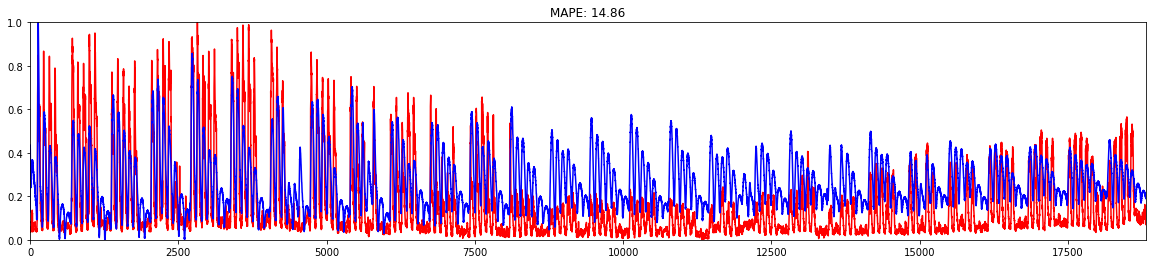

In [70]:
plt.figure(figsize=(20, 4))
plt.title(f'MAPE: {mean_absolute_percentage_error(label, pred):.4}')
plt.ylim(0, 1)
plt.xlim(0, 18816)
plt.plot(x_range, label, c='r')
plt.plot(x_range, pred, c='b')
plt.savefig('test.jpg', dpi=400)

In [4]:
def mean_absolute_percentage_error(y_true, y_pred, epsilon=1):
    diff = np.abs((y_true - y_pred) / np.clip(np.abs(y_true), epsilon, None))
    return 100. * np.mean(diff)

In [5]:
def scale(values):
    min_ = values.min()
    max_ = values.max()
    
    return (values - min_) / (max_ - min_)

In [6]:
def show(filename, prefix='aug'):
    try:
        data = Path('../data')
        results = Path(f'../{prefix}/{filename}')
        label = pd.read_csv(str(data.joinpath('test-label.csv'))).values[:, -1]
        pred = pd.read_csv(str(results.joinpath('prediction.csv'))).values[1:, -1]
        label = scale(label)
        pred = scale(pred)
        x_range = np.arange(np.size(label, 0))
        plt.figure(figsize=(20, 4))
        plt.title(f'MAPE: {mean_absolute_percentage_error(label, pred):.4}')
        plt.ylim(0, 1)
        plt.xlim(0, 18816)
        plt.plot(x_range, label, c='r')
        plt.plot(x_range, pred, c='b')
        plt.show()
    except:
        try:
            data = Path('../data')
            results = Path(f'../{prefix}/{filename}')
            label = pd.read_csv(str(data.joinpath('test-label.csv'))).values[:, -1]
            pred = pd.read_csv(str(results.joinpath('prediction.csv'))).values[:, -1]
            label = scale(label)
            pred = scale(pred)
            x_range = np.arange(np.size(label, 0))
            plt.figure(figsize=(20, 4))
            plt.title(f'MAPE: {mean_absolute_percentage_error(label, pred):.4}')
            plt.ylim(0, 1)
            plt.xlim(0, 18816)
            plt.plot(x_range, label, c='r')
            plt.plot(x_range, pred, c='b')
            plt.show()
        except:
            pass
#     plt.savefig('test.jpg', dpi=400)

In [ ]:
for i, input_size in enumerate([32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]):
    for j, hidden_size in enumerate([32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]):
        print(input_size, hidden_size)
        show(f'results-aug-{input_size}-{hidden_size}', prefix='aug')

In [10]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred, epsilon=1):
    diff = np.abs((y_true - y_pred) / np.clip(np.abs(y_true), epsilon, None))
    return 100. * np.mean(diff)

## Visualize by Day

In [50]:
mape_days = np.hstack((days_unique, np.empty((196, 1))))

In [51]:
data = Path('../data')
results = Path('../results')
dest = Path(f'../figures-scaled')
dest.mkdir(exist_ok=True)

In [52]:
label = pd.read_csv(str(data.joinpath('test-label.csv'))).values[:, -1]
pred_data = pd.read_csv(str(results.joinpath(f'prediction.csv'))).values
pred = pred_data[:, -1]

In [53]:
label = (label - label.min()) / (label.max() - label.min())
pred = (pred - pred.min()) / (pred.max() - pred.min())

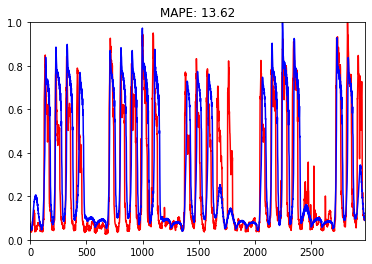

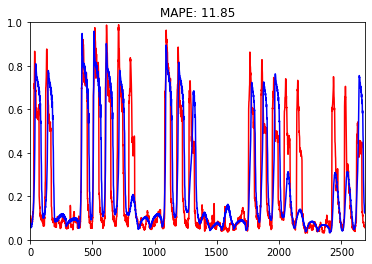

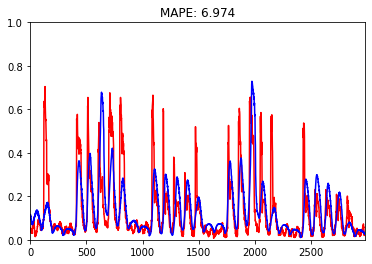

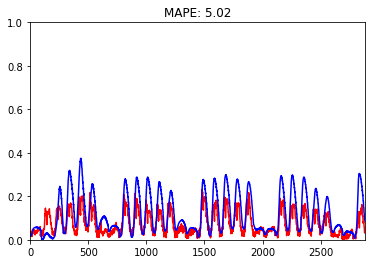

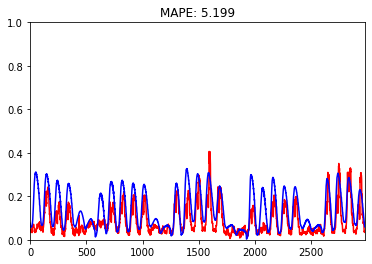

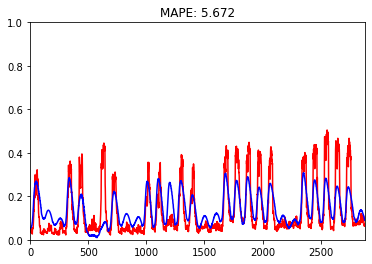

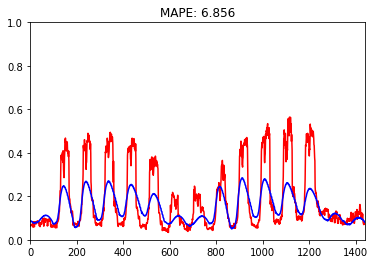

In [54]:
d = dest.joinpath('days')
d.mkdir(exist_ok=True)
days = pred_data[:, :2]
days_unique = np.sort(np.unique(days, axis=0))
for i, day in enumerate(days_unique):
    index = np.where((days == day).all(axis=1))
    mo, da = day
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    error = mean_absolute_percentage_error(label[index], pred[index])
    ax.set_title(f'MAPE: {error:.4}')
    mape_days[i, -1] = error
    ax.set_ylim((0, 1))
    ax.set_xlim((0, 96))
    ax.plot(label[index], c='r')
    ax.plot(pred[index], c='b')
    fig.savefig(str(d.joinpath(f'{int(mo):02}-{int(da):02}.jpg')), dpi=400)
    plt.close()
d = dest.joinpath('months')
d.mkdir(exist_ok=True)
months = pred_data[:, :1]
months_unique = np.unique(months, axis=0)
for month in months_unique:
    index = np.where((months == month).all(axis=1))
    mo = month

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(f'MAPE: {mean_absolute_percentage_error(label[index], pred[index]):.4}')
    ax.set_ylim((0, 1))
    ax.set_xlim((0, index[0].size))
    ax.plot(label[index], c='r')
    ax.plot(pred[index], c='b')
    plt.show()
    fig.savefig(str(d.joinpath(f'{int(mo):02}.jpg')), dpi=400)
    plt.close()

In [55]:
pd.DataFrame(mape_days, columns=['Month', 'Day', 'MAPE']).to_csv(str(dest.joinpath('mape-per-days.csv')), index=None)

## By day

In [ ]:
d = dest.joinpath('days')
d.mkdir(exist_ok=True)

In [ ]:
days = pred_data[:, :2]
days_unique = np.unique(days, axis=0)

In [ ]:
for day in days_unique:
    index = np.where((days == day).all(axis=1))
    mo, da = day

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_ylim((0, 1200))
    ax.set_xlim((0, 96))
    ax.plot(label[index], c='r')
    ax.plot(pred[index], c='b')
    fig.savefig(str(d.joinpath(f'{int(mo):02}-{int(da):02}.jpg')), dpi=400)
    plt.close()

## By month

In [ ]:
d = dest.joinpath('months')
d.mkdir(exist_ok=True)

In [ ]:
months = pred_data[:, :1]
months_unique = np.unique(months, axis=0)

In [ ]:
for month in months_unique:
    index = np.where((months == month).all(axis=1))
    mo = month

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_ylim((0, 1200))
    ax.set_xlim((0, index[0].size))
    ax.plot(label[index], c='r')
    ax.plot(pred[index], c='b')
    fig.savefig(str(d.joinpath(f'{int(mo):02}.jpg')), dpi=400)
    plt.close()